## Path Declearation

In [8]:
# Defining the path for all our dataset 
cath_path = '/Users/aneruthmohanasundaram/Documents/GitHub/Amino-Acid-Prediction/Assignment 1/Datasets/cath_info.txt'
dssp_path = '/Users/aneruthmohanasundaram/Documents/GitHub/Amino-Acid-Prediction/Assignment 1/Datasets/dssp_info.txt'
stride_path = '/Users/aneruthmohanasundaram/Documents/GitHub/Amino-Acid-Prediction/Assignment 1/Datasets/stride_info.txt'

In [9]:
# Performing some analysis to our dataset
import pandas as pd,seaborn as sns,matplotlib.pyplot as plt
%matplotlib inline
cath = pd.read_csv('/Users/aneruthmohanasundaram/Documents/GitHub/Amino-Acid-Prediction/Assignment 1/Datasets/cath_info.txt',delimiter = "\t",header=None, names=["PDB_CODE", "CHAIN_CODE", "Prediction"])

dssp = pd.read_csv('/Users/aneruthmohanasundaram/Documents/GitHub/Amino-Acid-Prediction/Assignment 1/Datasets/dssp_info.txt', delimiter = "\t",header=None, names=["PDB_code" , "PDB_chain_code" , "PDB_seq_code" , "residue_name" , "secondary_structure"])

stride = pd.read_csv('/Users/aneruthmohanasundaram/Documents/GitHub/Amino-Acid-Prediction/Assignment 1/Datasets/stride_info.txt',delimiter = "\t",header=None, names=["PDB_code" , "PDB_chain_code" , "PDB_seq_code" , "residue_name" , "secondary_structure"])

## Performing analysis of our given datasets

### To count total number of amino acid present in our Stide and DSSP dataset

Text(0.5, 1.0, 'DSSP Dataset')

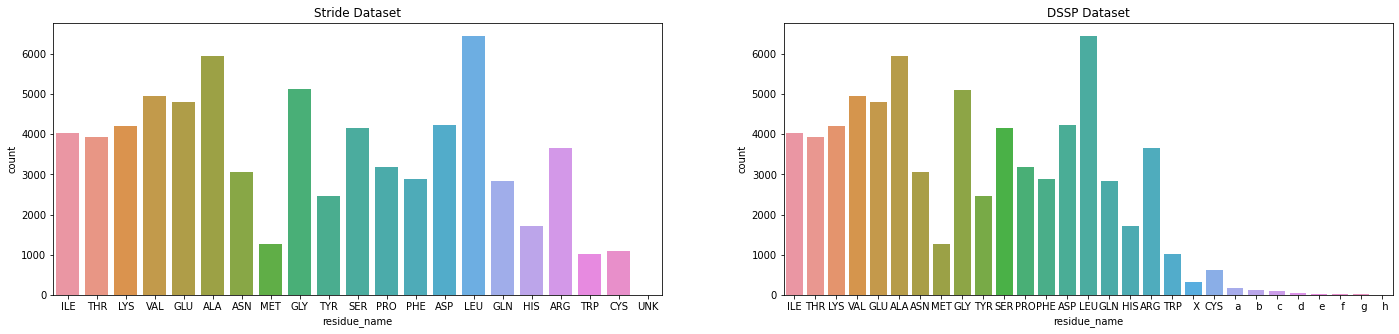

In [10]:
import warnings
warnings.filterwarnings("ignore")
fig, ax =plt.subplots(1,2,figsize=(24,5))
sns.countplot(stride['residue_name'], ax=ax[0])
ax[0].set_title('Stride Dataset')
sns.countplot(dssp['residue_name'], ax=ax[1])
ax[1].set_title('DSSP Dataset')

### Create a dictionary for our ammnio acid present in our dataset and intialising the count for our amino acid as 0, this is done because if we see how many amino acid present in our dataset. The reason why i chose this is because for both structure type and amino acids, there are many data structures. Using of both lists and dictionaries is that the purpose to the dictionaries is to act as the rows and columns of the tables that store self-information and residual data.

In [11]:
# amino = {'ALA': 0, 'ARG': 1, 'ASN': 2, 'ASP': 3, 'CYS': 4, 'GLU': 5, 'GLN': 6, 'GLY': 7, 'HIS': 8,'ILE': 9, 'LEU': 10, 'LYS': 11, 'MET': 12, 'PHE': 13, 'PRO': 14, 'SER': 15, 'THR': 16,'TRP': 17, 'TYR': 18, 'VAL': 19}

# To keep a count on amino acid present in our dataset
# This dictnary is count of 20 amino acid present in universal genetic code.
aminoCount = {'ALA': 0, 'ARG': 0, 'ASN': 0, 'ASP': 0, 'CYS': 0, 'GLU': 0, 'GLN': 0, 'GLY': 0, 'HIS': 0,'ILE': 0, 'LEU': 0, 'LYS': 0, 'MET': 0, 'PHE': 0, 'PRO': 0, 'SER': 0, 'THR': 0,'TRP': 0, 'TYR': 0, 'VAL': 0}


# Creating our dictionary to have check of type of structure in our dataset such as helix, coil and beta.
# H --> Helix strand, C --> Coil Strand, E --> Beta Strand
stru_dict = {'H': 0, 'E': 1, 'C': 2}
# stru_list = ['H', 'E', 'C']

In [15]:
# Since we have a txt file so we need to convert it to a list and choosing list is because they can be iterateable. 
def fileRead(path):
    fileOpen = open(path)
    return [i.split() for i in fileOpen.readlines()]
# My alternative approach is while having our dataset in form of csv we can do it as: 
def fileReadCSV(file_name):
    return [list(i) for i in file_name.values]

In [13]:
# This function prints total .... present in our dataset
def structure_type(alist):
    helixCount,betaCount,coilCount = 0,0,0 # Initialisng our helix, beta, coli count as 0 and thus incremented whenever we lookup for it in our dataset. 
    blist = []
    for i in alist: # Traverse through our list where we pass our fileRead function which return "list".
        if i[3] in aminoCount.keys(): # Checks if our thrid index of our list contains Amino acid in our dataset which it compares with our dictionary present.
            c = aminoCount.get(i[3])
            c += 1
            aminoCount.update({i[3]: c}) # If Amino acid matches with our dictionary then we update the values of Amino acid.
            if i[4] == 'Helix':
                i[-1] = 'H'
                helixCount += 1
            elif i[4] == 'Beta':
                i[-1] = 'E'
                betaCount += 1
            elif i[4] == 'Coil' or i[4] == 'Other':
                i[-1] = 'C'
                coilCount += 1
            blist.append(i)
    print(f'The Helix count is: {str(helixCount)}')
    print(f'The Beta count is: {str(betaCount)}')
    print(f'The Coil count is: {str(coilCount)}')
    print(f'Amino Acid count present in our dictionary is: {aminoCount}')
    return blist

In [21]:
# Structure type of Stride dataset path
print('Stride Structure:')
stride_struct = structure_type(fileRead(stride_path))
print('\n')
print('Dssp Structure:')
dssp_struct = structure_type(fileRead(dssp_path))

Stride Structure:
The Helix count is: 25755
The Beta count is: 16148
The Coil count is: 29170
Amino Acid count present in our dictionary is: {'ALA': 23850, 'ARG': 14660, 'ASN': 12212, 'ASP': 16974, 'CYS': 3935, 'GLU': 19263, 'GLN': 11396, 'GLY': 20473, 'HIS': 6861, 'ILE': 16136, 'LEU': 25796, 'LYS': 16851, 'MET': 5041, 'PHE': 11560, 'PRO': 12724, 'SER': 16590, 'THR': 15748, 'TRP': 4028, 'TYR': 9868, 'VAL': 19840}


Dssp Structure:
The Helix count is: 24862
The Beta count is: 15694
The Coil count is: 30031
Amino Acid count present in our dictionary is: {'ALA': 29811, 'ARG': 18325, 'ASN': 15265, 'ASP': 21216, 'CYS': 4561, 'GLU': 24078, 'GLN': 14245, 'GLY': 25589, 'HIS': 8577, 'ILE': 20170, 'LEU': 32245, 'LYS': 21063, 'MET': 6302, 'PHE': 14450, 'PRO': 15905, 'SER': 20736, 'THR': 19685, 'TRP': 5035, 'TYR': 12335, 'VAL': 24800}
